<a href="https://colab.research.google.com/github/jpmvbastos/AppliedEconometrics3/blob/main/MonteCarlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Econometrics III

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(array([  7.,  33.,  99., 215., 281., 218., 100.,  39.,   7.,   1.]),
 array([ 2.4247592 ,  5.20847094,  7.99218269, 10.77589444, 13.55960618,
        16.34331793, 19.12702968, 21.91074143, 24.69445317, 27.47816492,
        30.26187667]),
 <a list of 10 Patch objects>)

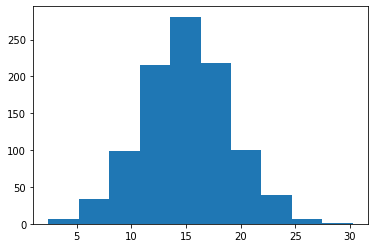

In [63]:
n = 1000
p = np.random.normal(15,4,n)
plt.hist(p)


Here is an alternative plot using Seaborn package. As we can see it looks nicer. Let's keep using that one.

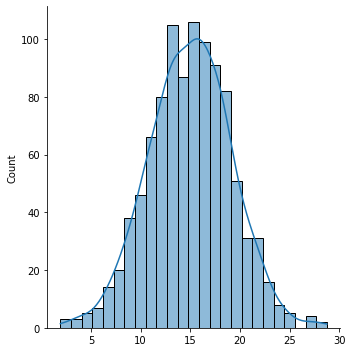

In [74]:
sns.displot(p, kde=True)

We can also set a more interesting design pattern:

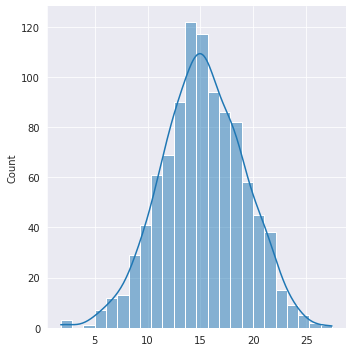

In [107]:
sns.set_style('darkgrid')
sns.displot(p, kde=True)

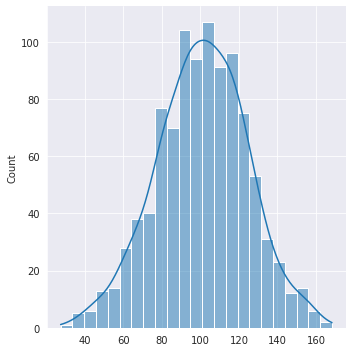

In [108]:
a = np.random.normal(100,25,n)
sns.displot(a, kde=True)

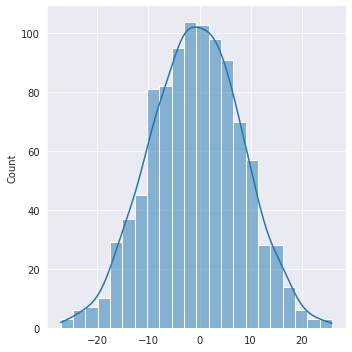

In [109]:
e = np.random.normal(0,9,n)
sns.displot(e, kde=True)

# Monte Carlo Simulations

In [67]:
y = 5 - 0.5*p + 0.37*a + e

In [68]:
X = np.array([np.ones(1000), p , a]).T
X.shape

(1000, 3)

In [69]:
b = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
b

array([ 6.06097386, -0.61993228,  0.37763211])

In [115]:
n=1000
b1k = np.array([])
for i in range(0,n):
  a = np.random.normal(100,25,n)
  p = np.random.normal(15,4,n)
  e = np.random.normal(0,9,n)
  X = np.array([np.ones(n), p , a]).T
  y = 5 - 0.5*p + 0.37*a + e
  b = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
  b1k = np.append(b1k, b)

b1k = pd.DataFrame(b1k.reshape(n,3)).add_prefix('b')
b1k

,b0,b1,b2
0,3.902005,-0.486306,0.377322
1,5.223760,-0.522883,0.368200
2,6.125825,-0.626356,0.377238
3,5.996074,-0.626443,0.379983
4,5.207579,-0.674092,0.390477
...,...,...,...
995,4.975963,-0.537530,0.378612
996,4.936498,-0.488450,0.365982
997,2.954983,-0.474448,0.385897
998,6.806352,-0.536877,0.355085


In [116]:
for column in b1k.columns:
  print(b1k[column].mean())

4.956732775130519
-0.49892111409622375
0.37016389011976286


What if we repeat the process 10000 times?


In [117]:
n=10000
b10k = np.array([])
for i in range(0,n):
  a = np.random.normal(100,25,n)
  p = np.random.normal(15,4,n)
  e = np.random.normal(0,9,n)
  X = np.array([np.ones(n), p , a]).T
  y = 5 - 0.5*p + 0.37*a + e
  b = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
  b10k = np.append(b10k, b)

b10k = pd.DataFrame(b10k.reshape(n,3)).add_prefix('b')
b10k

,b0,b1,b2
0,4.705817,-0.486255,0.370587
1,4.506477,-0.480316,0.370576
2,5.251365,-0.504693,0.369375
3,5.802065,-0.511933,0.364367
4,4.987346,-0.506580,0.371156
...,...,...,...
9995,4.133309,-0.463139,0.372064
9996,4.984777,-0.499186,0.369324
9997,4.853251,-0.493343,0.370022
9998,4.015431,-0.494257,0.379675


In [119]:
for column in b10k.columns:
  print(b10k[column].mean())

5.000620140771959
-0.499894362171067
0.36997689720364185


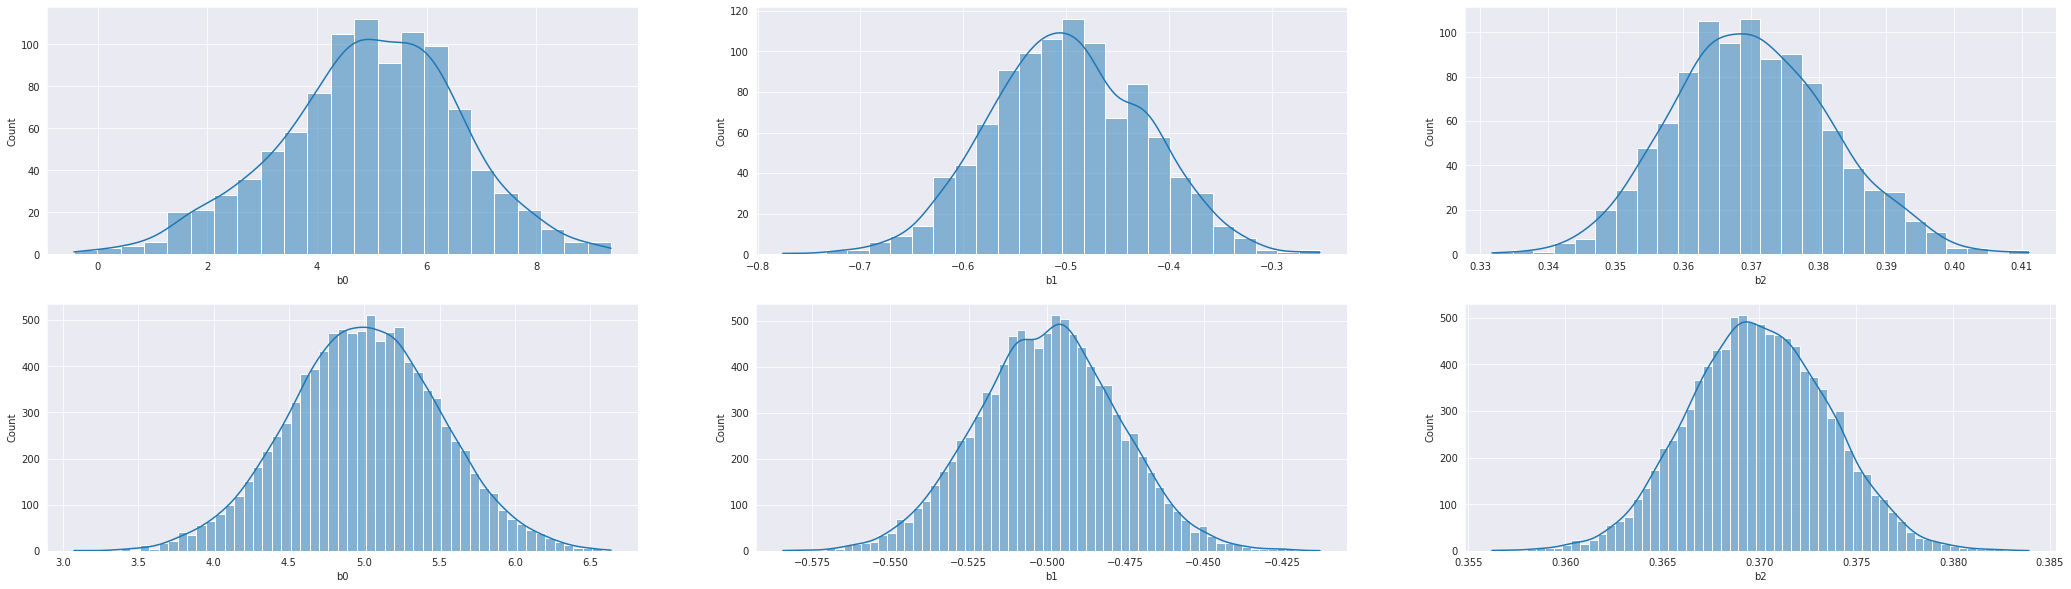

In [121]:
fig, axs = plt.subplots(2,3, figsize=(36,10))
sns.histplot(b1k['b0'], kde=True, ax=axs[0,0])
sns.histplot(b1k['b1'], kde=True, ax=axs[0,1])
sns.histplot(b1k['b2'], kde=True, ax=axs[0,2])
sns.histplot(b10k['b0'], kde=True, ax=axs[1,0])
sns.histplot(b10k['b1'], kde=True, ax=axs[1,1])
sns.histplot(b10k['b2'], kde=True, ax=axs[1,2])

